# Thesis project

In [1]:
# !pip install pandas openpyxl
# !pip install graphviz pretty_confusion_matrix pydotplus shap kneed
# !pip install scikit-learn==1.2.2

## Import packages

In [2]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }a
</style>
"""))


In [3]:
1#general
import pandas as pd
import numpy as np
from scipy import stats
import statistics
from sklearn.preprocessing import scale
from scipy.stats import t
from sklearn.preprocessing import StandardScaler

In [4]:
# Import relevant packages for Lasso & Data Splitting
from sklearn.linear_model import Lasso
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [5]:
import seaborn as sns
import pylab as pyl

In [6]:
#Import relevant packages for 
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

In [7]:
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.metrics import  confusion_matrix, precision_score, recall_score

In [8]:
import matplotlib.pyplot as plt
from matplotlib import colors
import warnings; warnings.simplefilter('ignore')

In [9]:
from imblearn.over_sampling import SMOTE
from imblearn import pipeline as pl 
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_recall_curve, auc

In [10]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [11]:
from imblearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [12]:
from sklearn.metrics import classification_report
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedGroupKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

In [13]:
# from sklearn.metrics import confusion_matrix
# from pretty_confusion_matrix import pp_matrix_from_data

## Import data

In [14]:
# Import Y DataFrame from CSV
data_Y_s= pd.read_csv('G:\\Mi unidad\\PUCP\\2021-2\\TESIS_1\\3_datos\\data_Y_s_271223_1.csv')

# Import X DataFrame from CSV
data_m = pd.read_csv('G:\\Mi unidad\\PUCP\\2021-2\\TESIS_1\\3_datos\\data_m_271223_1.csv')

In [15]:
import pandas as pd

# Assuming data_Y_s is a pandas DataFrame and deg_desempleo is a column in that DataFrame
value_counts_percent = data_Y_s['ano_19'].value_counts(normalize=True) * 100

print("Percentage of each value in 'deg_desemp':")
print(value_counts_percent)


Percentage of each value in 'deg_desemp':
0    76.569152
1    23.430848
Name: ano_19, dtype: float64


In [16]:
# data_Y_s=data_Y_s1[:1000]
# data_m=data_m1[:1000]

**Pregunta: i) deberia exportar la matriz de correlacion? o por partes (si alcanza tiempo)**

## CV Stratified

### Data Splitting

Here, we split the observations in 2 samples: the training set and the test set. Let's remember that our test set is composed from data collected between 2016 to 2019, and we are going test on a data set componsed of a little bit of each year. However, we are going to predict in 2020 and compare with what really happened. 

To begin with, we must create the X and y that are going to pass throught data splitting into training and test set. 

In [17]:
x_main_pre =  data_m.drop(['num_panel'], axis=1)
y_main_pre = data_Y_s.loc[:,('deg_desemp', 'ano_19')]
groups_pre = data_m[['ano_reg', 'ano_19']]

In [18]:
x_main_pre

,p203a,p558e6,p204,p208a,p306,p314a,p401c,p401f,p401h1,p401h2,...,p300a_1.0,ciiu_6c_1,ano_16,ano_17,ano_18,ano_19,regnat_1,regnat_2,regnat_3,ano_reg
0,1.0,6.0,1,37.560127,0.0,0.0,1.0,1.0,0.0,0.0,...,1,1,1,0,0,0,0,1,0,2
1,1.0,6.0,1,41.000000,0.0,0.0,1.0,1.0,0.0,0.0,...,0,1,1,0,0,0,0,1,0,2
2,1.0,6.0,1,42.000000,0.0,0.0,1.0,1.0,0.0,0.0,...,0,0,0,0,1,0,0,1,0,8
3,1.0,0.0,1,37.000000,0.0,1.0,1.0,1.0,0.0,0.0,...,0,0,0,1,0,0,0,1,0,5
4,1.0,6.0,1,51.000000,0.0,0.0,1.0,1.0,0.0,0.0,...,1,0,1,0,0,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18317,1.0,0.0,1,35.000000,0.0,0.0,1.0,1.0,0.0,0.0,...,0,1,1,0,0,0,0,1,0,2
18318,1.0,6.0,1,37.000000,0.0,0.0,1.0,1.0,0.0,0.0,...,0,1,0,0,1,0,0,1,0,8
18319,1.0,6.0,1,43.000000,0.0,0.0,1.0,1.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,2
18320,1.0,6.0,1,44.000000,0.0,0.0,1.0,1.0,0.0,0.0,...,0,1,0,0,1,0,0,1,0,8


In [19]:
# # Create an empty list to store the names of continuous variables
# continuous_cols = []

# # Set a threshold for the number of unique values to distinguish categorical from continuous variables
# unique_value_threshold = 8

# # Iterate through the columns and identify continuous variables
# for col in x_main_pre.columns:
#     # Check if the column is numeric
#     if x_main_pre[col].dtype in [int, float]:
#         # Check the number of unique values in the column
#         num_unique_values = x_main_pre[col].nunique()
        
#         # Consider it as continuous only if the number of unique values is above the threshold
#         if num_unique_values > unique_value_threshold:
#             continuous_cols.append(col)
        
#         # Print column name and data type
#         print(f"{col}: {x_main_pre[col].dtype}")

# # Now 'continuous_cols' will contain the names of continuous variables in the DataFrame
# print("Continuous Variables:", continuous_cols)


In [20]:
continous_col_total = [
    'y_pri_dep', 'y_pri_indep', 'y_pri', 'y_sec_dep', 'y_sec_ind', 'y_sec', 'y_mkt',
    'pobre2', 'gpcm', 'ingtrabw', 'ipcr_0', 'ipcr_1', 'ipcr_2', 'ipcr_3', 'ipcr_4',
    'ipcr_5', 'ipcr_6', 'ipcr_7', 'ipcr_8', 'ipcr_9', 'ipcr_10', 'ipcr_11', 'ipcr_12',
    'ipcr_13', 'ipcr_14', 'ipcr_15', 'ipcr_16', 'ipcr_17', 'ipcr_18', 'ipcr_19', 'ipcr_20',
    'gpgru1', 'gpgru2', 'gpgru3', 'gpgru4', 'gpgru5', 'gpgru6', 'gpgru7', 'gpgru8', 'gpgru9',
    'gpgru10', 'p104a', 'i1172_01', 'i1172_02', 'i1173_01', 'i1173_02', 'p208a', 'p512a', 'p513t',
    'n_edad_prim', 'n_edad_sec', 'n_edad_esc', 'n_matr_prim', 'n_matr_sec', 'n_matr_esc'
    
    ,'p203a'
]

f_cont_total = list(set(continous_col_total).intersection(x_main_pre.columns))

In [21]:
x_train_i = x_main_pre.loc[x_main_pre['ano_19'] != 1].drop(['ano_19'], axis=1)
y_train = y_main_pre.loc[y_main_pre['ano_19'] != 1].drop(['ano_19'], axis=1)

x_test_i = x_main_pre.loc[x_main_pre['ano_19'] == 1].drop(['ano_19'], axis=1)
y_test  = y_main_pre.loc[y_main_pre['ano_19'] == 1].drop(['ano_19'], axis=1)

groups = groups_pre.loc[x_main_pre['ano_19'] != 1].drop(['ano_19'], axis=1)

In [22]:
x_train_i['gpgru7'].isnull().sum()

0

In [23]:
# # Extract continuous and non-continuous columns from x_train_i
# x_train_continuous = x_train_i[f_cont_total]
# x_train_non_continuous = x_train_i.drop(columns=f_cont_total)
# x_train_continuous.isnull().sum()
# # Scale the continuous columns
# std = StandardScaler()

# scaled_continuous = pd.DataFrame(std.fit_transform(x_train_continuous))
# scaled_continuous                             
# #scaled_continuous.isnull().sum()
# # Create a new DataFrame with scaled continuous columns and non-continuous columns
# x_train = pd.concat([scaled_continuous, x_train_non_continuous], axis=1)
# x_train
# x_train['gpgru7'].isnull().sum()
# duplicated_columns = x_train.columns[x_train.columns.duplicated()]
# print("Duplicated columns: ", duplicated_columns)

In [24]:
x_train = pd.DataFrame(scale(x_train_i), columns=x_train_i.columns)
#y_train = pd.DataFrame(scaler.fit_transform(y_train_i), columns=y_train_i.columns)

x_test = pd.DataFrame(scale(x_test_i), columns=x_test_i.columns)
#y_test  = pd.DataFrame(scaler.fit_transform(y_test_i), columns=y_test_i.columns)

In [25]:
x_train

,p203a,p558e6,p204,p208a,p306,p314a,p401c,p401f,p401h1,p401h2,...,p599_1.0,p300a_1.0,ciiu_6c_1,ano_16,ano_17,ano_18,regnat_1,regnat_2,regnat_3,ano_reg
0,-0.471774,0.791669,0.0,-0.025269,-0.336637,-1.070250,0.026439,0.217377,-0.108422,-0.067697,...,-0.540960,2.892258,3.716739,1.998575,-0.807481,-0.825182,-1.13565,1.702359,-0.468836,-1.362590
1,-0.471774,0.791669,0.0,0.517424,-0.336637,-1.070250,0.026439,0.217377,-0.108422,-0.067697,...,-0.540960,-0.345751,3.716739,1.998575,-0.807481,-0.825182,-1.13565,1.702359,-0.468836,-1.362590
2,-0.471774,0.791669,0.0,0.675189,-0.336637,-1.070250,0.026439,0.217377,-0.108422,-0.067697,...,1.848565,-0.345751,-0.269053,-0.500356,-0.807481,1.211854,-1.13565,1.702359,-0.468836,1.167346
3,-0.471774,-1.263155,0.0,-0.113637,-0.336637,0.934361,0.026439,0.217377,-0.108422,-0.067697,...,-0.540960,-0.345751,-0.269053,-0.500356,1.238419,-0.825182,-1.13565,1.702359,-0.468836,-0.097622
4,-0.471774,0.791669,0.0,2.095075,-0.336637,-1.070250,0.026439,0.217377,-0.108422,-0.067697,...,1.848565,2.892258,-0.269053,1.998575,-0.807481,-0.825182,-1.13565,1.702359,-0.468836,-1.362590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14024,-0.471774,-1.263155,0.0,-0.429168,-0.336637,-1.070250,0.026439,0.217377,-0.108422,-0.067697,...,-0.540960,-0.345751,3.716739,1.998575,-0.807481,-0.825182,-1.13565,1.702359,-0.468836,-1.362590
14025,-0.471774,0.791669,0.0,-0.113637,-0.336637,-1.070250,0.026439,0.217377,-0.108422,-0.067697,...,-0.540960,-0.345751,3.716739,-0.500356,-0.807481,1.211854,-1.13565,1.702359,-0.468836,1.167346
14026,-0.471774,0.791669,0.0,0.832954,-0.336637,-1.070250,0.026439,0.217377,-0.108422,-0.067697,...,1.848565,-0.345751,-0.269053,1.998575,-0.807481,-0.825182,-1.13565,1.702359,-0.468836,-1.362590
14027,-0.471774,0.791669,0.0,0.990719,-0.336637,-1.070250,0.026439,0.217377,-0.108422,-0.067697,...,-0.540960,-0.345751,3.716739,-0.500356,-0.807481,1.211854,-1.13565,1.702359,-0.468836,1.167346


Let's remember the train set is going to be used to train the model (by simulating a lot of samples using the CV) and the test set is going to be used to test the model out-of-sample. 

In [26]:
X = pd.concat([x_train, x_test], ignore_index=True)
Y = pd.concat([y_train, y_test], ignore_index=True)

We have 193 variables in the model.

For the Stratified Group CV, we need to determine the variable groups that the code will interpret as groups of the x variables and the class will depend on the "groups" of y (2 classes: employment and nonemployment).

In [27]:
missing_counts = x_train.isna().sum().sort_values()
n = 15  # Number of last values you want to print
last_n_values = missing_counts[-n:]

print(last_n_values)

n_matr_prim      0
n_matr_sec       0
n_matr_esc       0
menor_trabaja    0
p103a_1.0        0
p103a_2.0        0
p103a_3.0        0
p103a_4.0        0
p103a_5.0        0
p103a_6.0        0
p103a_7.0        0
p103a_8.0        0
educ_0.0         0
regnat_3         0
ano_reg          0
dtype: int64


## Estimations

### Choosing the optimal lambda using grid search

We establish a a grid of posibles values for $\lambda$ using grid search. It starts at the value of 0 and then we started trying with different maximun values, as well as differente intervals between the values (that depend on the number of $\lambda$ we are planning to incluide.


In [28]:
#determining a set of lambdas to test wich one is the best
l_min = 0.001
l_max = 500
l_num = 1000
l_num_div=np.int(l_num/2)
lambdas = np.linspace(l_min,l_max, l_num)
lambdas

array([1.00000000e-03, 5.01499499e-01, 1.00199900e+00, 1.50249850e+00,
       2.00299800e+00, 2.50349750e+00, 3.00399700e+00, 3.50449650e+00,
       4.00499600e+00, 4.50549550e+00, 5.00599499e+00, 5.50649449e+00,
       6.00699399e+00, 6.50749349e+00, 7.00799299e+00, 7.50849249e+00,
       8.00899199e+00, 8.50949149e+00, 9.00999099e+00, 9.51049049e+00,
       1.00109900e+01, 1.05114895e+01, 1.10119890e+01, 1.15124885e+01,
       1.20129880e+01, 1.25134875e+01, 1.30139870e+01, 1.35144865e+01,
       1.40149860e+01, 1.45154855e+01, 1.50159850e+01, 1.55164845e+01,
       1.60169840e+01, 1.65174835e+01, 1.70179830e+01, 1.75184825e+01,
       1.80189820e+01, 1.85194815e+01, 1.90199810e+01, 1.95204805e+01,
       2.00209800e+01, 2.05214795e+01, 2.10219790e+01, 2.15224785e+01,
       2.20229780e+01, 2.25234775e+01, 2.30239770e+01, 2.35244765e+01,
       2.40249760e+01, 2.45254755e+01, 2.50259750e+01, 2.55264745e+01,
       2.60269740e+01, 2.65274735e+01, 2.70279730e+01, 2.75284725e+01,
      

In [29]:
de_lambda=np.std(lambdas)

In [30]:
your_seed=13

In [31]:
l_num_div

500

In [32]:
# from flaml import AutoML
# y_train_array = y_train.values
# # Define the pipeline with a search space for hyperparameters
# def get_pipeline(under_sampler__sampling_strategy, logistic_regression__C):
#     return make_pipeline(
#         RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42),
#         LogisticRegression(C=C, penalty='l1', solver='liblinear', random_state=42)
#     )

# # Specify the hyperparameter search space
# param_space = {
#     'under_sampler__sampling_strategy': ('auto', 0.5, 0.8),
#     'logistic_regression__C': (0.001, 0.01, 0.1, 1, 10),
# }

# # Create an AutoML instance
# automl = AutoML()

# # Run FLAML to search for the best hyperparameters
# automl.fit(X_train=x_train, y_train=y_train_array, task='classification', estimator_list=[('pipeline', get_pipeline, param_space)])

# # Print the best pipeline configuration and its performance
# print(automl.best_estimator)
# print(automl.best_config)
# print(automl.best_loss)

In [33]:
y_train.head()

,deg_desemp
0,0
1,0
2,0
3,0
4,0


## 1. Logit penalizado con Undersampling

In [34]:
training_scores = []
testing_scores = []
coefficients = [] 

In [35]:
for ind, i in enumerate(lambdas):
    # Create a pipeline with RandomUnderSampler and LogisticRegression with L1 penalty
    reg = pl.make_pipeline(
        RandomUnderSampler(random_state=your_seed),
        LogisticRegression(C=1/i, penalty='l1', solver='liblinear', random_state=your_seed)
    )
    
    reg.fit(x_train, y_train)
    
    skf = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=your_seed)
    results = cross_validate(reg, x_train, y_train, groups=groups, cv=skf, scoring="roc_auc", return_train_score=True)
    
    # Append the training and testing score means to the lists
    training_scores.append(results['train_score'].mean())
    testing_scores.append(results['test_score'].mean())
    
    # Capture the coefficients
    coefficients.append(reg.named_steps['logisticregression'].coef_.flatten())

In [36]:
#confidence intervals

# Number of bootstrap samples
num_bootstrap_samples = 1000

# Initialize an array to store bootstrap samples for 
bootstrap_samples_test = np.zeros((num_bootstrap_samples, len(testing_scores)))

# Perform bootstrapping
for i in range(num_bootstrap_samples):
    # Resample with replacement
    bootstrap_sample_test = resample(testing_scores)
    bootstrap_samples_test[i, :] = bootstrap_sample_test
    

# Initialize an array to store bootstrap samples
bootstrap_samples_tra = np.zeros((num_bootstrap_samples, len(training_scores)))

# Perform bootstrapping
for i in range(num_bootstrap_samples):
    # Resample with replacement
    bootstrap_sample_tra = resample(training_scores)
    bootstrap_samples_tra[i, :] = bootstrap_sample_tra

    

# Calculate mean and percentiles for confidence intervals
mean_scores_test = np.mean(bootstrap_samples_test, axis=0)
lower_bound_test = np.percentile(bootstrap_samples_test, 2.5, axis=0)
upper_bound_test = np.percentile(bootstrap_samples_test, 97.5, axis=0)

# Calculate mean and percentiles for confidence intervals
mean_scores_tra = np.mean(bootstrap_samples_tra, axis=0)
lower_bound_tra = np.percentile(bootstrap_samples_tra, 2.5, axis=0)
upper_bound_tra = np.percentile(bootstrap_samples_tra, 97.5, axis=0)

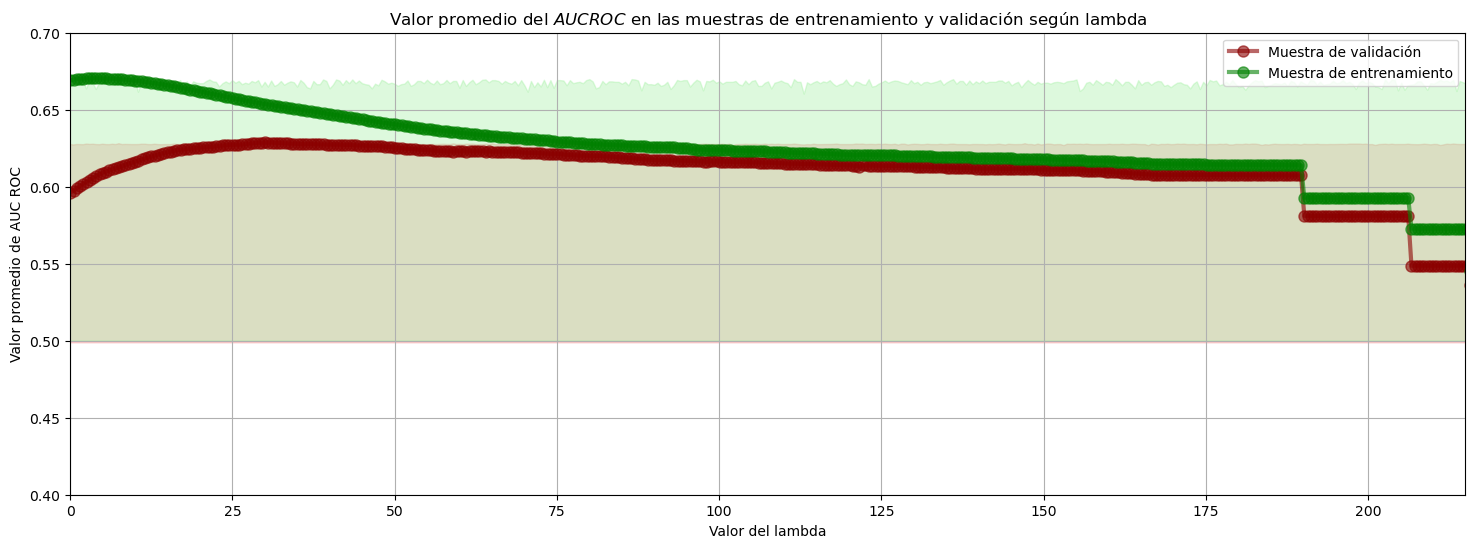

In [37]:
plt.figure(figsize=(18,6))

#plt.plot(np.std(testing_scores)+(testing_scores), 'bo-', label=r'Intervalos de confianza', color="darkblue", marker = "o",markersize = 8,  alpha=0.6, linewidth=3)
plt.plot(lambdas, testing_scores, label=r'Muestra de validación', color="darkred", marker = "o", markersize=8, alpha=0.6, linewidth=3)
#plt.plot((testing_scores)-np.std(testing_scores), 'bo-', marker = "o", color="darkblue", alpha=0.6, linewidth=3)
plt.fill_between(lambdas, lower_bound_test, upper_bound_test, color='lightcoral', alpha=0.3)


#plt.plot(np.std(training_scores)+(training_scores), 'bo-', color="darkblue", marker = "o",markersize = 8,  alpha=0.6, linewidth=3)
plt.plot(lambdas, training_scores, label=r'Muestra de entrenamiento', color="green", marker = "o", markersize=8, alpha=0.6, linewidth=3)
#plt.plot((training_scores)-np.std(training_scores), 'bo-', marker = "o", color="darkblue", alpha=0.6, linewidth=3)
plt.fill_between(lambdas, lower_bound_tra, upper_bound_tra, color='lightgreen', alpha=0.3)

plt.xlabel('Valor del lambda'); plt.ylabel('Valor promedio de AUC ROC')
plt.xlim(0,215)
plt.ylim(0.4,0.7)
plt.title('Valor promedio del $AUC ROC$ en las muestras de entrenamiento y validación según lambda')
plt.legend(loc='best')
plt.grid()

plt.savefig('G:\\Mi unidad\\PUCP\\2021-2\\TESIS_1\\4_grafico\\precision_1_lambda_completo_1.png')

In [38]:
#hallamos el lambda que maximiza el precision
df_lam = pd.DataFrame(testing_scores, columns=['metric'])
df_lam['lambda'] = (lambdas)
lamb_opt = df_lam.loc[df_lam['metric'].idxmax()]

lambda_optimal = lamb_opt['lambda']
lamb_opt

metric     0.62874
lambda    30.03097
Name: 60, dtype: float64

In [39]:
mean_metric_test = np.mean(df_lam['metric'], axis=0)
mean_metric_test

0.5507330824062642

In [40]:
df_lam_tra = pd.DataFrame(training_scores, columns=['metric'])
mean_metric_tra = np.mean(df_lam_tra['metric'], axis=0)
mean_metric_tra

0.5605111685283416

In [41]:
coefficients = np.array(coefficients)

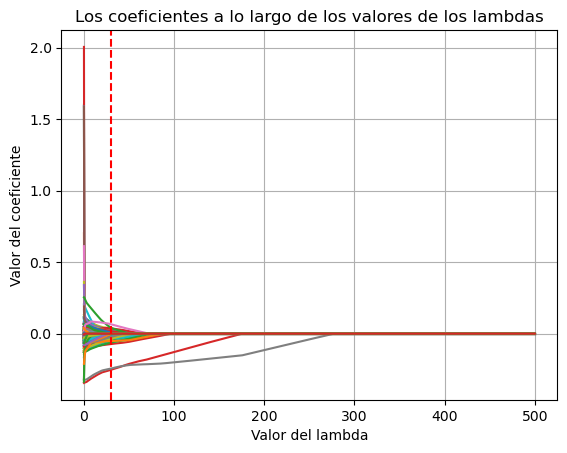

<Figure size 640x480 with 0 Axes>

In [42]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a numpy array 'lambdas' containing your lambda values
# and 'coefficients' is a numpy array with shape (number_of_lambda_values, number_of_features)
# You want to plot coefficients for the first 20 lambdas

# Plot lambda-coefficient graph for all coefficients on the same graph
for feature_index in range(coefficients.shape[1]):
    plt.plot(lambdas[:l_num], coefficients[:l_num, feature_index], label=f'Valor del coeficiente {feature_index}')

    # Add a vertical line at x = 16.2
plt.axvline(x=lambda_optimal, color='red', linestyle='--', label='Vertical Line at x=16.2')

plt.xlabel('Valor del lambda')
plt.ylabel('Valor del coeficiente')
plt.title('Los coeficientes a lo largo de los valores de los lambdas')
plt.grid(True)
# plt.legend(loc='best')
plt.show()


plt.savefig('G:\\Mi unidad\\PUCP\\2021-2\\TESIS_1\\4_grafico\\coeficiente_lambda_1_completo_1.png')

In [43]:
coef_dataframe= pd.DataFrame(coefficients)
coef_lambda = pd.concat([coef_dataframe, df_lam], axis=1)
filtered_coef_df = coef_lambda[coef_lambda['lambda'] == lambda_optimal]

columns_to_drop = ['metric', 'lambda']
filtered_coef_df.drop(columns=columns_to_drop, inplace=True)

non_zero_values = filtered_coef_df.iloc[0].sort_values()
non_zero_values

33    -0.252506
37    -0.243926
3     -0.072850
112   -0.061456
32    -0.059545
         ...   
5      0.027224
28     0.031614
83     0.037005
212    0.042145
216    0.065904
Name: 60, Length: 224, dtype: float64

In [44]:
min_value_coef=0.1

non_zero_variable_names = non_zero_values[non_zero_values.abs() > min_value_coef]

In [45]:
nzvn = non_zero_values[non_zero_values.abs() > min_value_coef].index.tolist()
nzvn

[33, 37]

In [46]:
# Select columns by index
selected_columns = x_test.iloc[:, nzvn]

#export data
# Export Y DataFrame to CSV
selected_columns.to_csv('G://Mi unidad//PUCP//2021-2//TESIS_1//3_datos//test_data_var_1.csv', index=False)
selected_columns 
#all the values that this varaibles take 

,y_mkt,ingtrabw
0,4.687733,0.455518
1,-0.650223,-0.973016
2,0.417368,1.516308
3,0.000118,0.755036
4,-0.650223,-0.973016
...,...,...
4288,-0.579940,-0.556893
4289,-0.365532,-0.169259
4290,-0.650223,-0.973016
4291,-0.650223,-0.973016


In [47]:
column_info_list = list(zip(selected_columns.columns, nzvn))
column_info_df = pd.DataFrame(column_info_list, columns=['ColumnName', 'NZVN'])

m_values_columns = pd.merge(column_info_df, non_zero_values, left_on='NZVN', right_index=True)
m_values_columns

,ColumnName,NZVN,60
0,y_mkt,33,-0.252506
1,ingtrabw,37,-0.243926


In [48]:
absolute_values = non_zero_values.abs().sort_values()
nzvn_10 = absolute_values.tail(10).index.tolist()

# Select columns by index
selected_columns_10 = x_test.iloc[:, nzvn_10]

#export data
# Export Y DataFrame to CSV
selected_columns_10.to_csv('G://Mi unidad//PUCP//2021-2//TESIS_1//3_datos//test_data_var_1_10.csv', index=False)


In [49]:
column_info_list_10 = list(zip(selected_columns_10.columns, nzvn_10))
column_info_df_10 = pd.DataFrame(column_info_list_10, columns=['ColumnName', 'NZVN'])

m_values_columns_10 = pd.merge(column_info_df_10, absolute_values, left_on='NZVN', right_index=True)
m_values_columns_10

,ColumnName,NZVN,60
0,tamahno_1,212,0.042145
1,p401h5,12,0.049223
2,p203_1,171,0.051341
3,dpto_5,109,0.057764
4,y_sec,32,0.059545
5,dpto_8,112,0.061456
6,ciiu_6c_1,216,0.065904
7,p208a,3,0.072850
8,ingtrabw,37,0.243926
9,y_mkt,33,0.252506


In [50]:
# coefficients

In [51]:
# # Import necessary libraries
# import matplotlib.pyplot as plt
# import numpy as np

# # Assuming you have a numpy array 'lambdas' containing your lambda values
# # and 'coefficients' is a numpy array with shape (number_of_lambda_values, number_of_features)
# # You want to plot coefficients for the first 20 lambdas

# # Plot lambda-coefficient graph for all coefficients on the same graph
# for feature_index in range(coefficients.shape[1]):
#     plt.plot(lambdas[:l_num_div], coefficients[:l_num_div, feature_index], label=f'Coefficient for Feature {feature_index}')

# plt.xlabel('Lambda Values')
# plt.ylabel('Coefficient Value')
# plt.title('Los coeficientes a lo largo de los valores de los lambdas (del 0 al 5)')
# plt.grid(True)
# # plt.legend(loc='best')
# plt.show()

# plt.savefig('G:\\Mi unidad\\PUCP\\2021-2\\TESIS_1\\4_grafico\\coeficiente_lambda_1_first_1.png')

## 2. Logit penalizado con SMOTE

In [52]:
training_scores2 = []
testing_scores2 = []
coefficients2 = [] 

In [53]:
for ind, i in enumerate(lambdas):
    # Create a pipeline with RandomUnderSampler and LogisticRegression with L1 penalty
    reg2 = pl.make_pipeline(
        SMOTE(random_state=your_seed),
        LogisticRegression(C=1/i, penalty='l1', solver='liblinear', random_state=your_seed)
    )
    
    reg2.fit(x_train, y_train)
    
    skf2 = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=your_seed)
    results2 = cross_validate(reg2, x_train, y_train, groups=groups, cv=skf2, scoring="roc_auc", return_train_score=True)
    
    # Append the training and testing score means to the lists
    training_scores2.append(results2['train_score'].mean())
    testing_scores2.append(results2['test_score'].mean())
    
    # Capture the coefficients
    coefficients2.append(reg2.named_steps['logisticregression'].coef_.flatten())

In [54]:
#confidence intervals

# Number of bootstrap samples
num_bootstrap_samples = 1000

# Initialize an array to store bootstrap samples for 
bootstrap_samples_test2 = np.zeros((num_bootstrap_samples, len(testing_scores2)))

# Perform bootstrapping
for i in range(num_bootstrap_samples):
    # Resample with replacement
    bootstrap_sample_test2 = resample(testing_scores2)
    bootstrap_samples_test2[i, :] = bootstrap_sample_test2
    

# Initialize an array to store bootstrap samples
bootstrap_samples_tra2 = np.zeros((num_bootstrap_samples, len(training_scores2)))

# Perform bootstrapping
for i in range(num_bootstrap_samples):
    # Resample with replacement
    bootstrap_sample_tra2 = resample(training_scores2)
    bootstrap_samples_tra2[i, :] = bootstrap_sample_tra2

    

# Calculate mean and percentiles for confidence intervals
mean_scores_test2 = np.mean(bootstrap_samples_test2, axis=0)
lower_bound_test2 = np.percentile(bootstrap_samples_test2, 2.5, axis=0)
upper_bound_test2 = np.percentile(bootstrap_samples_test2, 97.5, axis=0)

# Calculate mean and percentiles for confidence intervals
mean_scores_tra2 = np.mean(bootstrap_samples_tra2, axis=0)
lower_bound_tra2 = np.percentile(bootstrap_samples_tra2, 2.5, axis=0)
upper_bound_tra2 = np.percentile(bootstrap_samples_tra2, 97.5, axis=0)

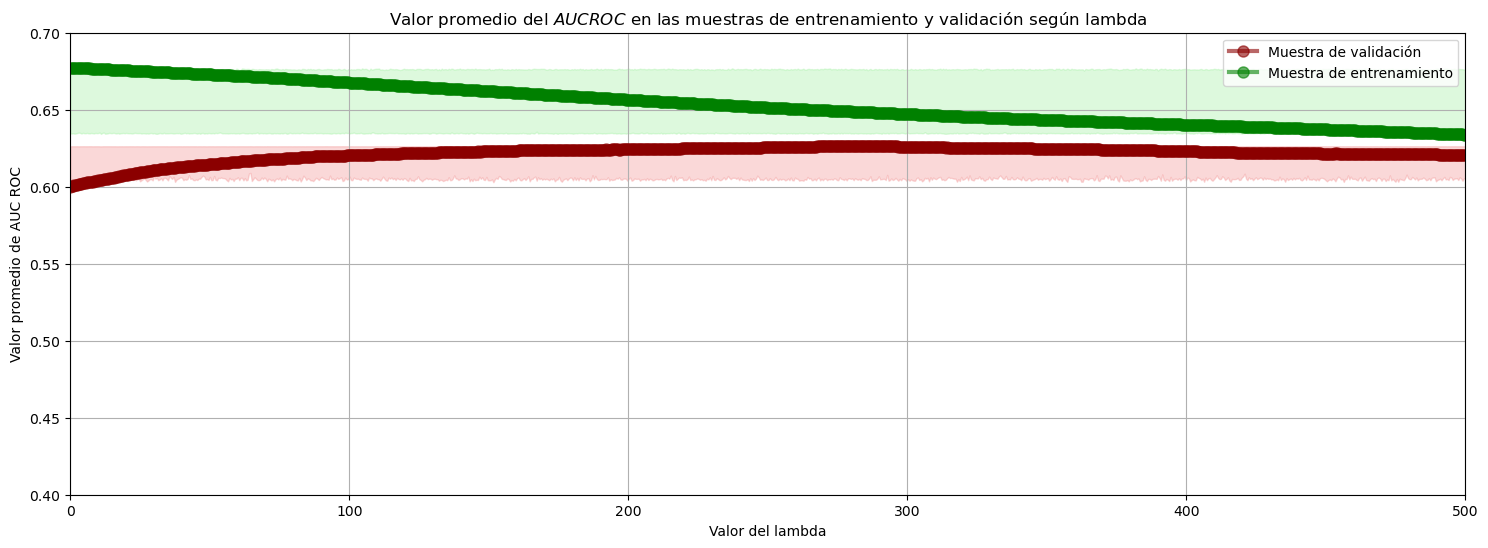

In [55]:
plt.figure(figsize=(18,6))

#plt.plot(np.std(testing_scores2)+(testing_scores2), 'bo-', label=r'Intervalos de confianza', color="darkblue", marker = "o",markersize = 8,  alpha=0.6, linewidth=3)
plt.plot(lambdas, testing_scores2, label=r'Muestra de validación', color="darkred", marker = "o", markersize=8, alpha=0.6, linewidth=3)
#plt.plot((testing_scores2)-np.std(testing_scores2), 'bo-', marker = "o", color="darkblue", alpha=0.6, linewidth=3)
plt.fill_between(lambdas, lower_bound_test2, upper_bound_test2, color='lightcoral', alpha=0.3)

#plt.plot(np.std(training_scores2)+(training_scores2), 'bo-', color="darkblue", marker = "o",markersize = 8,  alpha=0.6, linewidth=3)
plt.plot(lambdas, training_scores2, label=r'Muestra de entrenamiento', color="green", marker = "o", markersize=8, alpha=0.6, linewidth=3)
#plt.plot((training_scores2)-np.std(training_scores2), 'bo-', marker = "o", color="darkblue", alpha=0.6, linewidth=3)
plt.fill_between(lambdas, lower_bound_tra2, upper_bound_tra2, color='lightgreen', alpha=0.3)


plt.xlabel('Valor del lambda'); plt.ylabel('Valor promedio de AUC ROC')
plt.xlim(0,500)
plt.ylim(0.4,0.7)
plt.title('Valor promedio del $AUC ROC$ en las muestras de entrenamiento y validación según lambda')
plt.legend(loc='best')
plt.grid()

plt.savefig('G:\\Mi unidad\\PUCP\\2021-2\\TESIS_1\\4_grafico\\precision_2_lambda_completo_1.png')

In [56]:
#hallamos el lambda que maximiza el precision
df_lam2 = pd.DataFrame(testing_scores2, columns=['metric'])
df_lam2['lambda'] = (lambdas)
lamb_opt2 = df_lam2.loc[df_lam2['metric'].idxmax()]
lambda_optimal2 = lamb_opt2['lambda']
lamb_opt2

metric      0.626331
lambda    280.280720
Name: 560, dtype: float64

In [57]:
mean_metric_test2 = np.mean(df_lam2['metric'], axis=0)
mean_metric_test2

0.6215634564534726

In [58]:
df_lam_tra2 = pd.DataFrame(training_scores2, columns=['metric'])
mean_metric_tra2 = np.mean(df_lam_tra2['metric'], axis=0)
mean_metric_tra2

0.6534391290367284

In [59]:
coefficients2 = np.array(coefficients2)

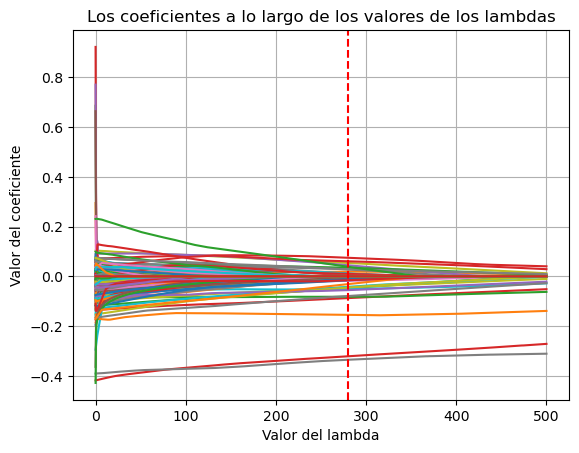

<Figure size 640x480 with 0 Axes>

In [60]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a numpy array 'lambdas' containing your lambda values
# and 'coefficients' is a numpy array with shape (number_of_lambda_values, number_of_features)
# You want to plot coefficients for the first 20 lambdas

# Plot lambda-coefficient graph for all coefficients on the same graph
for feature_index in range(coefficients2.shape[1]):
    plt.plot(lambdas[:l_num], coefficients2[:l_num, feature_index], label=f'Valor del coeficiente {feature_index}')

    # Add a vertical line at x = 16.2
plt.axvline(x=lambda_optimal2, color='red', linestyle='--', label='Vertical Line at x=16.2')

plt.xlabel('Valor del lambda')
plt.ylabel('Valor del coeficiente')
plt.title('Los coeficientes a lo largo de los valores de los lambdas')
plt.grid(True)
# plt.legend(loc='best')
plt.show()


plt.savefig('G:\\Mi unidad\\PUCP\\2021-2\\TESIS_1\\4_grafico\\coeficiente_lambda_2_completo_1.png')

In [61]:
coef_dataframe2= pd.DataFrame(coefficients2)
coef_lambda2 = pd.concat([coef_dataframe2, df_lam2], axis=1)
filtered_coef_df2= coef_lambda2[coef_lambda2['lambda'] == lambda_optimal]

columns_to_drop = ['metric', 'lambda']
filtered_coef_df2.drop(columns=columns_to_drop, inplace=True)

non_zero_values2 = filtered_coef_df2.iloc[0].sort_values()
non_zero_values2

33    -0.396344
37    -0.382453
171   -0.165374
207   -0.151176
138   -0.136285
         ...   
192    0.079956
84     0.091521
28     0.097299
93     0.114308
212    0.201232
Name: 60, Length: 224, dtype: float64

In [62]:
min_value_coef=0.1

non_zero_variable_names2 = non_zero_values2[non_zero_values2.abs() > min_value_coef]

In [63]:
nzvn2 = non_zero_values2[non_zero_values2.abs() > min_value_coef].index.tolist()

In [64]:
# Select columns by index
selected_columns2 = x_test.iloc[:, nzvn2]
#export data
# Export Y DataFrame to CSV
selected_columns2.to_csv('G://Mi unidad//PUCP//2021-2//TESIS_1//3_datos//test_data_var2_1.csv', index=False)

In [65]:
column_info_list2 = list(zip(selected_columns2.columns, nzvn2))
column_info_df2 = pd.DataFrame(column_info_list2, columns=['ColumnName', 'NZVN2'])

m_values_columns2 = pd.merge(column_info_df2, non_zero_values2, left_on='NZVN2', right_index=True)
m_values_columns2

,ColumnName,NZVN2,60
0,y_mkt,33,-0.396344
1,ingtrabw,37,-0.382453
2,p203_1,171,-0.165374
3,ipcr_15,207,-0.151176
4,p599_3.0,138,-0.136285
5,p208a,3,-0.128630
6,sector_7,211,-0.125455
7,p209_3,99,-0.117378
8,p401h5,12,-0.109350
9,estrato_2,93,0.114308


In [66]:
absolute_values2 = non_zero_values2.abs().sort_values()
nzvn_102 = absolute_values2.tail(10).index.tolist()

# Select columns by index
selected_columns_102 = x_test.iloc[:, nzvn_102]

#export data
# Export Y DataFrame to CSV
selected_columns_102.to_csv('G://Mi unidad//PUCP//2021-2//TESIS_1//3_datos//test_data_var_1_10.csv', index=False)


In [67]:
column_info_list_102 = list(zip(selected_columns_102.columns, nzvn_102))
column_info_df_102 = pd.DataFrame(column_info_list_102, columns=['ColumnName', 'NZVN'])

m_values_columns_102 = pd.merge(column_info_df_102, absolute_values2, left_on='NZVN', right_index=True)
m_values_columns_102

,ColumnName,NZVN,60
0,estrato_2,93,0.114308
1,p209_3,99,0.117378
2,sector_7,211,0.125455
3,p208a,3,0.128630
4,p599_3.0,138,0.136285
5,ipcr_15,207,0.151176
6,p203_1,171,0.165374
7,tamahno_1,212,0.201232
8,ingtrabw,37,0.382453
9,y_mkt,33,0.396344


## Estimating the ROC curve with the optimal lamba for each model

## 1. Penalized Logit with Undersampling

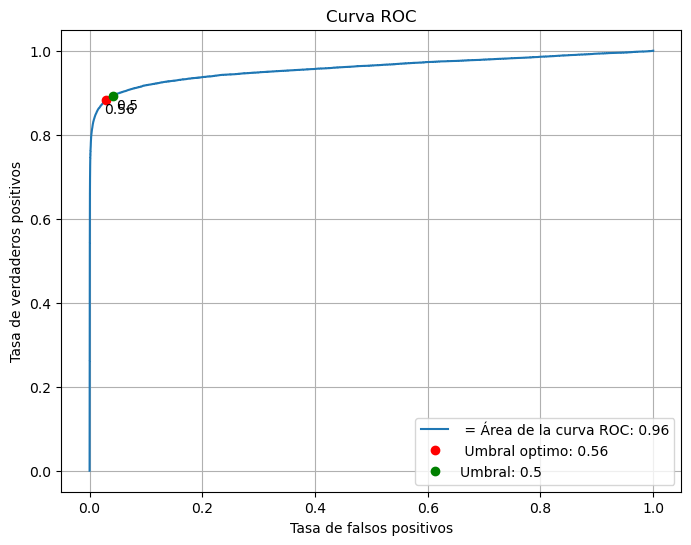

In [68]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


# # Create the dataset
X, Y = make_classification(n_samples=1000000, n_classes=2, weights=[0.89, 0.10], random_state=1)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2341, random_state=42)  # Use a random state to ensure reproducibility


# Create the pipeline
reg = make_pipeline(
    RandomUnderSampler(random_state=your_seed),
    LogisticRegression(C=1/lambda_optimal, penalty='l1', solver='liblinear', random_state=your_seed)
)

# Fit the model using the training data
reg_log = reg.fit(X_train, Y_train)

# Now, you can use the fitted model for prediction or evaluation
y_pred = reg.predict(X_test)


y_true=Y_test

scores = reg_log.predict_proba(X_test)[:,1]


# ROC
low = min(scores)
high = max(scores)

step = (low+ high)/100

thresholds = np.arange(low, high, step)


# Assuming y_true and scores are defined
fpr, tpr, thresholds = roc_curve(y_true, scores)

# Calculate the J statistic for each threshold
J = tpr - fpr

# Find the index of the maximum J statistic for the optimal threshold
optimal_idx = J.argmax()
optimal_threshold = thresholds[optimal_idx]

# Find the index of the threshold closest to 0.5
closest_half_idx = np.abs(thresholds - 0.5).argmin()

# Calculate AUC-ROC
auc = roc_auc_score(y_true, scores)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f' = Área de la curva ROC: {auc:.2f}')
plt.plot(fpr[optimal_idx], tpr[optimal_idx], 'ro', label=f' Umbral optimo: {optimal_threshold:.2f}')
plt.plot(fpr[closest_half_idx], tpr[closest_half_idx], 'go', label='Umbral: 0.5')

# Adding annotations, labels, and legend
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")

# Highlight the points with annotations
plt.annotate(f'{optimal_threshold:.2f}', (fpr[optimal_idx], tpr[optimal_idx]), textcoords="offset points", xytext=(10,-10), ha='center')
plt.annotate('0.5', (fpr[closest_half_idx], tpr[closest_half_idx]), textcoords="offset points", xytext=(10,-10), ha='center')

plt.grid(True)
plt.show()

In [69]:
thresholds

array([1.99999999e+00, 9.99999994e-01, 9.99997199e-01, ...,
       2.48736139e-04, 2.44269848e-04, 3.49861243e-05])

##  2. Penalized logit with SMOTE

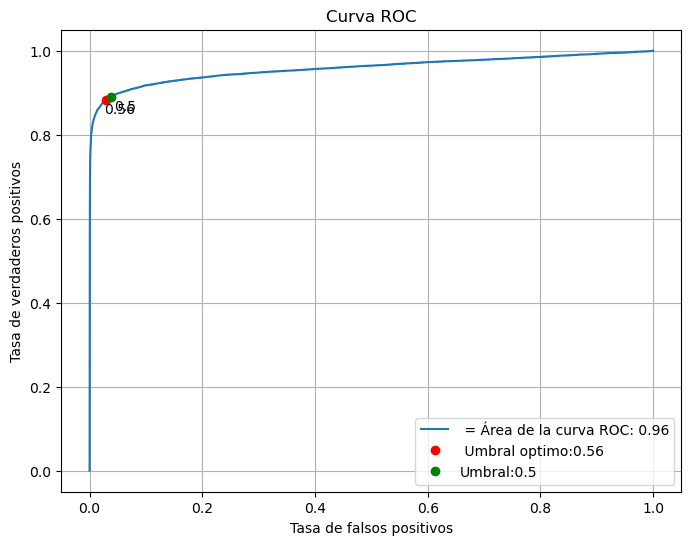

In [70]:

# # Create the dataset
X, y = make_classification(n_samples=1000000, n_classes=2, weights=[0.89, 0.10], random_state=1)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2341, random_state=42)  # Use a random state to ensure reproducibility

# Create the pipeline
reg2 = make_pipeline(
    SMOTE(random_state=your_seed),
        LogisticRegression(C=1/lambda_optimal2, penalty='l1', solver='liblinear', random_state=your_seed)
)

# Fit the model using the training data
reg2_log = reg2.fit(X_train, Y_train)

# Now, you can use the fitted model for prediction or evaluation
y_pred2 = reg2.predict(X_test)


y_true=Y_test

scores2 = reg2_log.predict_proba(X_test)[:,1]


# ROC
low = min(scores2)
high = max(scores2)

step = (low+ high)/100

thresholds = np.arange(low, high, step)
# Assuming y_true and scores are defined
fpr, tpr, thresholds = roc_curve(y_true, scores2)

# Calculate the J statistic for each threshold
J = tpr - fpr

# Find the index of the maximum J statistic for the optimal threshold
optimal_idx = J.argmax()
optimal_threshold = thresholds[optimal_idx]

# Find the index of the threshold closest to 0.5
closest_half_idx = np.abs(thresholds - 0.5).argmin()

# Calculate AUC-ROC
auc = roc_auc_score(y_true, scores2)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f' = Área de la curva ROC: {auc:.2f}')
plt.plot(fpr[optimal_idx], tpr[optimal_idx], 'ro', label=f' Umbral optimo:{optimal_threshold:.2f}')
plt.plot(fpr[closest_half_idx], tpr[closest_half_idx], 'go', label='Umbral:0.5')

# Adding annotations, labels, and legend
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")

# Highlight the points with annotations
plt.annotate(f'{optimal_threshold:.2f}', (fpr[optimal_idx], tpr[optimal_idx]), textcoords="offset points", xytext=(10,-10), ha='center')
plt.annotate('0.5', (fpr[closest_half_idx], tpr[closest_half_idx]), textcoords="offset points", xytext=(10,-10), ha='center')

plt.grid(True)
plt.show()

In [71]:
from sklearn.metrics import roc_auc_score

In [72]:
low = min(scores2)
high = max(scores2)

step = (low+ high)/100

thresholds = np.arange(low, high, step)
thresholds

array([9.52680804e-06, 1.00096221e-02, 2.00097173e-02, 3.00098126e-02,
       4.00099079e-02, 5.00100031e-02, 6.00100984e-02, 7.00101936e-02,
       8.00102889e-02, 9.00103842e-02, 1.00010479e-01, 1.10010575e-01,
       1.20010670e-01, 1.30010765e-01, 1.40010860e-01, 1.50010956e-01,
       1.60011051e-01, 1.70011146e-01, 1.80011242e-01, 1.90011337e-01,
       2.00011432e-01, 2.10011527e-01, 2.20011623e-01, 2.30011718e-01,
       2.40011813e-01, 2.50011908e-01, 2.60012004e-01, 2.70012099e-01,
       2.80012194e-01, 2.90012289e-01, 3.00012385e-01, 3.10012480e-01,
       3.20012575e-01, 3.30012670e-01, 3.40012766e-01, 3.50012861e-01,
       3.60012956e-01, 3.70013051e-01, 3.80013147e-01, 3.90013242e-01,
       4.00013337e-01, 4.10013433e-01, 4.20013528e-01, 4.30013623e-01,
       4.40013718e-01, 4.50013814e-01, 4.60013909e-01, 4.70014004e-01,
       4.80014099e-01, 4.90014195e-01, 5.00014290e-01, 5.10014385e-01,
       5.20014480e-01, 5.30014576e-01, 5.40014671e-01, 5.50014766e-01,
      

### 3. Lasso penalizados post-CV usando SMOTE

### 4. Lasso penalizados post-CV usando Undersampling

# Using the optimal lambda to estimate the optimal model

In [73]:
## Estimating in the method where we estimated train and tested

### 1. Logit Penalized using undersampling

In [81]:
#uso de pipeline

pipeline_final = pl.make_pipeline(
    RandomUnderSampler(random_state=your_seed),
    LogisticRegression(C=1/lambda_optimal, penalty='l1', solver='liblinear', random_state=your_seed)
    )

# Fit the pipeline to the training data
pipeline_final.fit(x_train, y_train)

# Predict probabilities for the positive class
y_proba = pipeline_final.predict_proba(x_test)[:, 1]  # Selecting probabilities for the positive class

# Apply the custom threshold to determine class labels
threshold = 0.56
y_pred_bal = (y_proba >= threshold).astype(int)


In [82]:
# y_pred_bal 

In [83]:
# predicted_labels = [1 if prob[1] >= 0.175 else 0 for prob in y_pred_bal]
# predicted_labels 

In [84]:
# Step 1: Calculate the sum of all values in the array
# Calculate mean and standard deviation
mean = np.mean(y_pred_bal)
std_dev = np.std(y_pred_bal, ddof=1)  # ddof=1 for sample standard deviation

# Set confidence level and degrees of freedom
confidence_level = 0.95
degrees_of_freedom = len(y_pred_bal) - 1

# Calculate confidence interval
confidence_interval = t.interval(confidence_level, degrees_of_freedom, loc=mean, scale=std_dev/np.sqrt(len(y_pred_bal)))

print("Mean:", mean)
print("Confidence Interval:", confidence_interval)

Mean: 0.3615187514558584
Confidence Interval: (0.34714135621172726, 0.3758961466999895)


In [85]:
#metrics para dataset imbalanceados
classification_rep = classification_report_imbalanced(y_test, y_pred_bal)
print(classification_rep)

roc_auc = roc_auc_score(y_test, y_pred_bal)
print(roc_auc)

#metrics para dataset
#print(classification_report(y_test, y_pred_bal))

#son iguales a pesar de aplicar SMOTE 

                   pre       rec       spe        f1       geo       iba       sup

          0       0.93      0.67      0.58      0.78      0.62      0.39      3822
          1       0.18      0.58      0.67      0.27      0.62      0.38       471

avg / total       0.85      0.66      0.59      0.72      0.62      0.39      4293

0.6236805354184789


Confusion Matrix:
[[2544 1278]
 [ 197  274]]


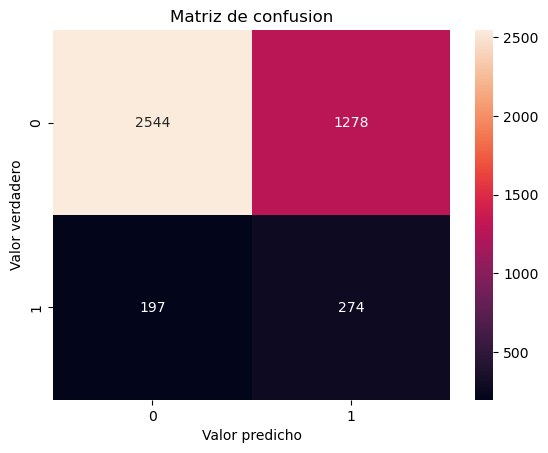

In [86]:
# # Convert the classification report dictionary to a pandas DataFrame
# df_classification = pd.DataFrame(classification_rep)

# # Add the ROC AUC score as a new row in the DataFrame
# df_classification.loc['ROC AUC'] = roc_auc

# # Export the DataFrame to an Excel file
# df_classification.to_excel('G:\\Mi unidad\\PUCP\\2021-2\\TESIS_1\\4_grafico\\classification_results_1_1.xlsx', sheet_name='results')

conf_matrix = confusion_matrix(y_test, y_pred_bal)

print("Confusion Matrix:")
#pl.matshow(conf_matrix)
ax= plt.subplot()
sns.heatmap(conf_matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
ax.set_xlabel('Valor predicho');ax.set_ylabel('Valor verdadero'); 
ax.set_title('Matriz de confusion'); 
#ax.xaxis.set_ticklabels(['Mantiene bienestar', 'Pierde bienestar']); ax.yaxis.set_ticklabels(['Pierde bienestar', 'Mantiene bienestar']);
print(conf_matrix)


### 2. Logit Penalized using SMOTE

In [87]:
#uso de pipeline

pipeline_final2 = pl.make_pipeline(
    SMOTE(random_state=your_seed),
    LogisticRegression(C=1/lambda_optimal2, penalty='l1', solver='liblinear', random_state=your_seed)
    )
#1.822273
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

pipeline_final2.fit(x_train, y_train)

# Predict probabilities for the positive class
y_proba = pipeline_final2.predict_proba(x_test)[:, 1]  # Selecting probabilities for the positive class

# Apply the custom threshold to determine class labels
threshold = 0.56
y_pred_bal = (y_proba >= threshold).astype(int)

# y_pred_bal 

In [88]:
# predicted_labels = [1 if prob[1] >= 0.175 else 0 for prob in y_pred_bal]
# predicted_labels 

In [89]:
# Step 1: Calculate the sum of all values in the array
# Calculate mean and standard deviation
mean = np.mean(y_pred_bal)
std_dev = np.std(y_pred_bal, ddof=1)  # ddof=1 for sample standard deviation

# Set confidence level and degrees of freedom
confidence_level = 0.95
degrees_of_freedom = len(y_pred_bal) - 1

# Calculate confidence interval
confidence_interval = t.interval(confidence_level, degrees_of_freedom, loc=mean, scale=std_dev/np.sqrt(len(y_pred_bal)))

print("Confidence Interval:", confidence_interval)
print("Media:", mean)

Confidence Interval: (0.36770828366684, 0.39679206573916975)
Media: 0.3822501747030049


In [90]:
#append selected column con coefficients para ver quienes se van

In [91]:
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression

#metrics para dataset imbalanceados
print(classification_report_imbalanced(y_test, y_pred_bal))
print(roc_auc_score(y_test, y_pred_bal))

#metrics para dataset
#print(classification_report(y_test, y_pred_bal ))

#son iguales a pesar de aplicar SMOTE 

                   pre       rec       spe        f1       geo       iba       sup

          0       0.93      0.65      0.62      0.76      0.63      0.40      3822
          1       0.18      0.62      0.65      0.27      0.63      0.40       471

avg / total       0.85      0.64      0.62      0.71      0.63      0.40      4293

0.6311156995870371


Confusion Matrix:
[[2471 1351]
 [ 181  290]]


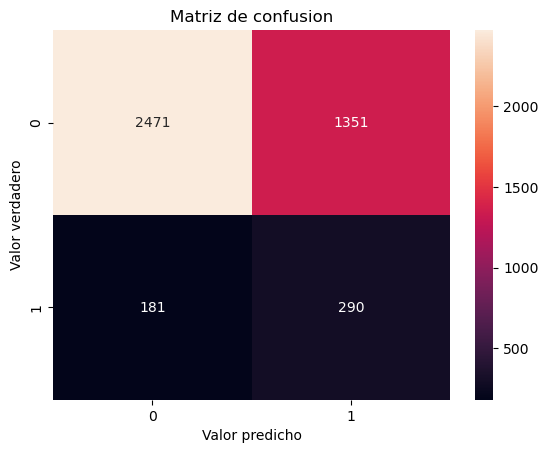

In [92]:

conf_matrix = confusion_matrix(y_test, y_pred_bal)

print("Confusion Matrix:")

ax= plt.subplot()
sns.heatmap(conf_matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
ax.set_xlabel('Valor predicho');ax.set_ylabel('Valor verdadero'); 
ax.set_title('Matriz de confusion'); 
#ax.xaxis.set_ticklabels(['Mantiene bienestar', 'Pierde bienestar']); ax.yaxis.set_ticklabels(['Pierde bienestar', 'Mantiene bienestar']);
print(conf_matrix)
